# Edge Detection

We might suppose that the brightness of our image has discontinuities. If we find the points of discontinuity and draw a a set of curved segments around them, we have edges.

Our image is a two dimensional display, and so we do not have to worry about depth-of-field or point spread. We also do not have to worry about penumbral blurring, I don't believe.

A one-dimensional image $f$ that has exactly one edge placed at $x = 0$ may be modeled as the below function. The [error function](https://en.wikipedia.org/wiki/Error_function) accounts for the effects of edge blurring.

$f(x) = \frac{I_r - I_\ell}{2} \left( \operatorname{erf}\left(\frac{x}{\sqrt{2}\sigma}\right) + 1\right) + I_\ell$

At the left side of the edge, the intensity is $\ell = \lim_{x \rightarrow -\infty} f(x)$, and right of the edge it is $I_r = \lim_{x \rightarrow \infty} f(x)$ The scale parameter $sigma$ is called the blur scale of the edge.

### A difficult task

Edge detection is particuarly difficult. One approach is to find the local max and mins (zero-crossing based method) by computing a measure of 'edge strength', which is usually the gradient magnitude. Typically, Guassian smoothing is applied before edge detection.

The principle technique of these methods is to compute derivatives of pictures. One common algorithm is the Sobel–Feldman operator, which is a so-called first-order method. While effective, the problem we encounter is that all of the edges will be shown. This is more information than we want for the problem. Below is the rendering of the image being run through a Sobel-Feldman operator.

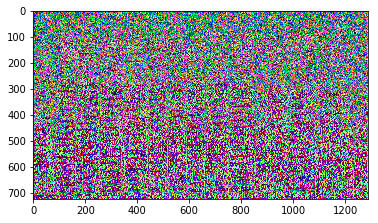

In [17]:
# Sobel edge detection

import cv2 
import numpy as np
from matplotlib import pyplot as plt
  
image = cv2.imread('violin.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      
# Calcution of Sobelx 
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5) 
      
plt.imshow(sobelx.astype(np.uint8)) 
plt.show()

That worked wonderfully. But there are a few problems with the code. We need to take the absolute value, and there's a lot of noise in the image to start.

What happens when we take the Laplacian?

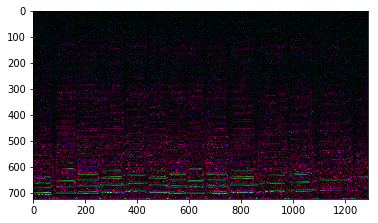

In [22]:
import cv2
import numpy as np

img = cv2.imread('violin.png',cv2.IMREAD_GRAYSCALE)
# 5x5 kernel is most common
kernel = np.ones((5,5),np.uint8)
dilated_img = cv2.dilate(img,kernel,iterations = 1)

# take the Laplacian of the image
lap = cv2.Laplacian(image, cv2.CV_64F)
#compute absolute value
lap = np.uint8(np.absolute(lap))

plt.imshow(lap, cmap = 'gray')
plt.show()

It looks whimpy! We need to understand what is happening. Laplacian is a second derivative filter instead of a first derivative filter.

There's a positive Laplacian filter and a negative one. The positive filter checks for outward edges and the negative checks for inward edges.


### Sobel

The Sobel operator uses two 3x3 kernels which are convulved with the original image to calculate derivatives for the horizontal and vertical changes of gradient in an image.

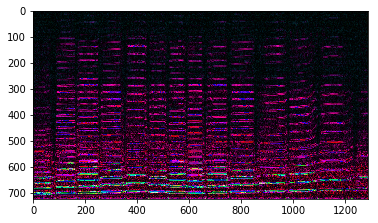

In [26]:
# Compute gradients along the X and Y axis, respectively

import cv2
import numpy as np

img = cv2.imread('violin.png',0)
# 5x5 kernel is most common
kernel = np.ones((5,5),np.uint8)

dilated_img = cv2.dilate(img,kernel,iterations = 1)

sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

plt.imshow(sobelY, cmap = 'gray')
plt.show()

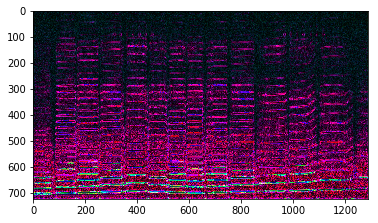

In [27]:
import cv2
import numpy as np

img = cv2.imread('violin.png',0)
# 5x5 kernel is most common
kernel = np.ones((5,5),np.uint8)

dilated_img = cv2.dilate(img,kernel,iterations = 1)

sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

plt.imshow(sobelCombined, cmap = 'gray')
plt.show()